<a href="https://colab.research.google.com/github/jennifermarie6sl/p4/blob/main/p4_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Dependancies

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
df_c = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/p4/FINAL_data.csv")
df_c

,Unnamed: 0,Country,year,Region,happiness_rank,happiness_score,gpd_per_capita,Family,life_expectancy,Freedom,government_corruption,Generosity
0,0,Switzerland,2015.0,Western Europe,1.0,7.587,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780
1,1,Iceland,2015.0,Western Europe,2.0,7.561,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300
2,2,Denmark,2015.0,Western Europe,3.0,7.527,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390
3,3,Norway,2015.0,Western Europe,4.0,7.522,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990
4,4,Canada,2015.0,North America,5.0,7.427,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110
...,...,...,...,...,...,...,...,...,...,...,...,...
444,292,Guinea,2017.0,Africa,149.0,3.507,0.244550,0.791245,0.194129,0.348588,0.110938,0.264815
445,294,Togo,2017.0,Africa,150.0,3.495,0.305445,0.431883,0.247106,0.380426,0.095665,0.196896
446,296,Rwanda,2017.0,Africa,151.0,3.471,0.368746,0.945707,0.326425,0.581844,0.455220,0.252756
447,302,Burundi,2017.0,Africa,154.0,2.905,0.091623,0.629794,0.151611,0.059901,0.084148,0.204435


## Explore data

In [ ]:
df_c["year"].value_counts()

2015.0    158
2016.0    157
2017.0    134
Name: year, dtype: int64

In [ ]:
df_c["Region"].value_counts()

Sub-Saharan Africa                 78
Central and Eastern Europe         58
Latin America and Caribbean        46
Western Europe                     42
Africa                             40
Middle East and Northern Africa    39
Asia                               37
Europe                             34
Americas                           21
Southeastern Asia                  18
Southern Asia                      14
Eastern Asia                       12
North America                       4
Australia and New Zealand           4
Oceania                             2
Name: Region, dtype: int64

In [ ]:
df_c["Country"].value_counts()

Belgium              3
Cambodia             3
Lithuania            3
Mauritius            3
Montenegro           3
                    ..
Puerto Rico          1
Somaliland region    1
Swaziland            1
Somaliland Region    1
Oman                 1
Name: Country, Length: 164, dtype: int64

## Drop columns unnecessary for machine learning

In [ ]:
df_c = df_c.drop(["happiness_rank", "year", "Region", "Unnamed: 0"], axis='columns')
df_c.head()

,Country,happiness_score,gpd_per_capita,Family,life_expectancy,Freedom,government_corruption,Generosity
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [ ]:
df_c.corr

<bound method DataFrame.corr of                       Country  ...  Generosity
0                 Switzerland  ...    0.296780
1                     Iceland  ...    0.436300
2                     Denmark  ...    0.341390
3                      Norway  ...    0.346990
4                      Canada  ...    0.458110
..                        ...  ...         ...
444                    Guinea  ...    0.264815
445                      Togo  ...    0.196896
446                    Rwanda  ...    0.252756
447                   Burundi  ...    0.204435
448  Central African Republic  ...    0.280876

[449 rows x 8 columns]>

#### Data is being overfit so we will drop the countries

In [ ]:
df_c

,Country,happiness_score,gpd_per_capita,Family,life_expectancy,Freedom,government_corruption,Generosity
0,Switzerland,7.587,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780
1,Iceland,7.561,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300
2,Denmark,7.527,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390
3,Norway,7.522,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990
4,Canada,7.427,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110
...,...,...,...,...,...,...,...,...
444,Guinea,3.507,0.244550,0.791245,0.194129,0.348588,0.110938,0.264815
445,Togo,3.495,0.305445,0.431883,0.247106,0.380426,0.095665,0.196896
446,Rwanda,3.471,0.368746,0.945707,0.326425,0.581844,0.455220,0.252756
447,Burundi,2.905,0.091623,0.629794,0.151611,0.059901,0.084148,0.204435


## View Correlation between columns after dropping country

In [ ]:
corr_df = df_c.drop(["Country"], axis='columns')
corr_df
corr_df.corr

<bound method DataFrame.corr of      happiness_score  gpd_per_capita  ...  government_corruption  Generosity
0              7.587        1.396510  ...               0.419780    0.296780
1              7.561        1.302320  ...               0.141450    0.436300
2              7.527        1.325480  ...               0.483570    0.341390
3              7.522        1.459000  ...               0.365030    0.346990
4              7.427        1.326290  ...               0.329570    0.458110
..               ...             ...  ...                    ...         ...
444            3.507        0.244550  ...               0.110938    0.264815
445            3.495        0.305445  ...               0.095665    0.196896
446            3.471        0.368746  ...               0.455220    0.252756
447            2.905        0.091623  ...               0.084148    0.204435
448            2.693        0.000000  ...               0.056565    0.280876

[449 rows x 7 columns]>

## Train, Test, Split for ML

In [ ]:
# Split our preprocessed data into our features and target arrays
X1 = df_c.drop(columns="happiness_score").values
y1 = df_c.happiness_score.values

# Split the preprocessed data into a training and testing dataset
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=42)
data = X1_train, X1_test, y1_train, y1_test

## Save out list of countries and features data

In [ ]:
countries_train = [x[0] for x in X1_train]
countries_test = [x[0] for x in X1_test]

In [ ]:
X1_train = [x[1:] for x in X1_train]
X1_test = [x[1:] for x in X1_test]

In [ ]:
compare_df = pd.DataFrame({'country':countries_test, 'actual': y1_test, 'predicted': 'pred'})
compare_df

,country,actual,predicted
0,Senegal,4.219,pred
1,Ivory Coast,3.916,pred
2,Sudan,4.550,pred
3,Saudi Arabia,6.344,pred
4,Mauritius,5.477,pred
...,...,...,...
108,Finland,7.406,pred
109,Japan,5.987,pred
110,Benin,3.340,pred
111,Liberia,3.622,pred


## Scale our data

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X1_scaler = scaler.fit(X1_train)

# Scale the data
X1_train_scaled = X1_scaler.transform(X1_train)
X1_test_scaled = X1_scaler.transform(X1_test)

In [ ]:
data= [X1_train_scaled, X1_test_scaled, y1_train, y1_test]

## Run ML models

In [ ]:
from sklearn.linear_model import LinearRegression
classifier = LinearRegression()
# classifier

# Fit the model to the data
classifier.fit(X1_train_scaled, y1_train)

print(f"Training Data Score: {classifier.score(X1_train_scaled, y1_train)}")
print(f"Testing Data Score: {classifier.score(X1_test_scaled, y1_test)}")

predictions_clr = classifier.predict(X1_test_scaled)
predictions_df= pd.DataFrame({"Prediction": predictions_clr, "Actual": y1_test})
predictions_df

Training Data Score: 0.7393901378351614
Testing Data Score: 0.8494853874320927


,Prediction,Actual
0,4.334137,4.219
1,4.105379,3.916
2,4.231418,4.550
3,6.352160,6.344
4,5.857241,5.477
...,...,...
108,6.868960,7.406
109,6.488988,5.987
110,4.045141,3.340
111,3.500724,3.622


ValueError: ignored

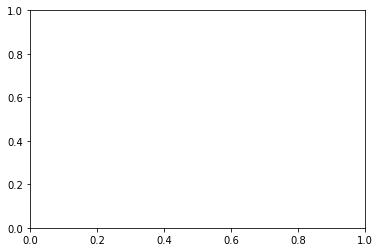

In [ ]:
# Plot outputs
plt.scatter(X1_test, y1_test, color="black")
plt.plot(y1_test, predictions_clr, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor().fit(X1_train_scaled, y1_train)
print(f'Training Score: {clf.score(X1_train_scaled, y1_train)}')
print(f'Testing Score: {clf.score(X1_test_scaled, y1_test)}')

predictions_c = clf.predict(X1_test_scaled)
predictions_df= pd.DataFrame({"Prediction": predictions_c, "Actual": y1_test})
predictions_df

Training Score: 0.9708014872290939
Testing Score: 0.8043519191257575


,Prediction,Actual
0,4.21766,4.219
1,4.33208,3.916
2,4.18593,4.550
3,6.18564,6.344
4,4.79941,5.477
...,...,...
108,7.08380,7.406
109,6.08956,5.987
110,3.82846,3.340
111,3.84463,3.622


In [ ]:
# from sklearn.ensemble import Lasso
clf = linear_model.Lasso(alpha=.001).fit(X1_train_scaled, y1_train)
print(f'Training Score: {clf.score(X1_train_scaled, y1_train)}')
print(f'Testing Score: {clf.score(X1_test_scaled, y1_test)}')

predictions_lasso = clf.predict(X1_test_scaled)
predictions_l_df= pd.DataFrame({"Lasso Prediction": predictions_lasso, "Actual": y1_test})
predictions_l_df

Training Score: 0.7393882377459953
Testing Score: 0.8492500569803096


,Lasso Prediction,Actual
0,4.335502,4.219
1,4.107270,3.916
2,4.232256,4.550
3,6.351271,6.344
4,5.856566,5.477
...,...,...
108,6.866531,7.406
109,6.488401,5.987
110,4.047649,3.340
111,3.503025,3.622


In [ ]:
from sklearn.svm import SVR
model2 = SVR(kernel='rbf', C=1.0, epsilon=.001) # set kernel and hyperparameters
svr = model2.fit(X1_train_scaled, y1_train)
print(f'Training Score: {svr.score(X1_train_scaled, y1_train)}')
print(f'Testing Score: {svr.score(X1_test_scaled, y1_test)}')

predictions_svr = svr.predict(X1_test_scaled)
predictions_svr_df= pd.DataFrame({"SVR Prediction": predictions_svr, "Actual": y1_test})
predictions_svr_df

Training Score: 0.8494933797860317
Testing Score: 0.858728773446082


,SVR Prediction,Actual
0,4.188270,4.219
1,4.162281,3.916
2,4.277339,4.550
3,5.825041,6.344
4,5.847854,5.477
...,...,...
108,7.222481,7.406
109,6.233820,5.987
110,3.881112,3.340
111,3.403106,3.622


## Save DataFrame containing data for export

In [ ]:
compare_df = pd.DataFrame({'country':countries_test, 'actual': y1_test, 'svr predicted': predictions_svr, 'linear predicted': predictions_clr, 'lasso predicted': predictions_lasso, 'random forest':predictions_c})
compare_df

,country,actual,svr predicted,linear predicted,lasso predicted,random forest
0,Senegal,4.219,4.188270,4.334137,4.335502,4.21766
1,Ivory Coast,3.916,4.162281,4.105379,4.107270,4.33208
2,Sudan,4.550,4.277339,4.231418,4.232256,4.18593
3,Saudi Arabia,6.344,5.825041,6.352160,6.351271,6.18564
4,Mauritius,5.477,5.847854,5.857241,5.856566,4.79941
...,...,...,...,...,...,...
108,Finland,7.406,7.222481,6.868960,6.866531,7.08380
109,Japan,5.987,6.233820,6.488988,6.488401,6.08956
110,Benin,3.340,3.881112,4.045141,4.047649,3.82846
111,Liberia,3.622,3.403106,3.500724,3.503025,3.84463


In [ ]:
compare_df.to_csv("/content/drive/MyDrive/Colab Notebooks/p4/prediction_comparison.csv", index= False)

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.svm import SVR

In [ ]:
    data = X1_train_scaled, X1_test_scaled, y1_train, y1_test

In [ ]:
def test_model(model, data):
    X1_train_scaled, X1_test_scaled, y1_train, y1_test = data
    reg = model.fit(X1_train_scaled, y1_train)
    print(f'Model: {type(reg).__name__}')
    print(f'Train score: {reg.score(X1_train_scaled, y1_train)}')
    print(f'Test Score: {reg.score(X1_test_scaled, y1_test)}\n')
    plt.show()   

In [ ]:
test_model(LinearRegression(), data)
test_model(Ridge(), data)
test_model(Lasso(alpha = .001), data)
test_model(ElasticNet(), data)
test_model(SVR(C=1.0, epsilon=0.001), data)
test_model(KNeighborsRegressor(), data)
test_model(RandomForestRegressor(random_state=1, n_estimators=100), data)
test_model(ExtraTreesRegressor(), data)
test_model(AdaBoostRegressor(), data)

Model: LinearRegression
Train score: 0.7393901378351614
Test Score: 0.8494853874320927

Model: Ridge
Train score: 0.7393880852483157
Test Score: 0.849521505688118

Model: Lasso
Train score: 0.7393882377459953
Test Score: 0.8492500569803096

Model: ElasticNet
Train score: 0.36889495181065124
Test Score: 0.3764101126508038

Model: SVR
Train score: 0.8494933797860317
Test Score: 0.858728773446082

Model: KNeighborsRegressor
Train score: 0.8624256742518872
Test Score: 0.8070943187204942

Model: RandomForestRegressor
Train score: 0.9717845928130108
Test Score: 0.8089776021871344

Model: ExtraTreesRegressor
Train score: 1.0
Test Score: 0.8317952068526652

Model: AdaBoostRegressor
Train score: 0.8377618355186389
Test Score: 0.80377082440374



TypeError: ignored

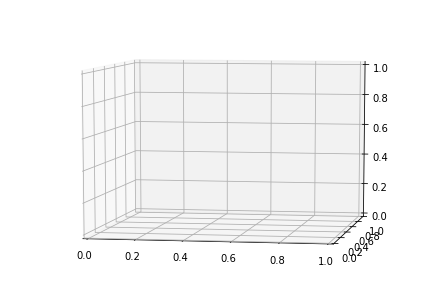

In [ ]:
import mpl_toolkits.mplot3d.axes3d as p3
# #############################################################################
# Plot the result
fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
ax.scatter(X1[0], X1[1], X1[2],
           color=plt.cm.jet(y1/y1.max()),
           s=20, edgecolor='k')
plt.show()

## Separate Training Dataset and Testing Dataset


In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/p4/FINAL_data.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/p4/2019_updated.csv")
train_df

,Unnamed: 0,Country,year,Region,happiness_rank,happiness_score,gpd_per_capita,Family,life_expectancy,Freedom,government_corruption,Generosity
0,0,Switzerland,2015.0,Western Europe,1.0,7.587,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780
1,1,Iceland,2015.0,Western Europe,2.0,7.561,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300
2,2,Denmark,2015.0,Western Europe,3.0,7.527,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390
3,3,Norway,2015.0,Western Europe,4.0,7.522,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990
4,4,Canada,2015.0,North America,5.0,7.427,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110
...,...,...,...,...,...,...,...,...,...,...,...,...
444,292,Guinea,2017.0,Africa,149.0,3.507,0.244550,0.791245,0.194129,0.348588,0.110938,0.264815
445,294,Togo,2017.0,Africa,150.0,3.495,0.305445,0.431883,0.247106,0.380426,0.095665,0.196896
446,296,Rwanda,2017.0,Africa,151.0,3.471,0.368746,0.945707,0.326425,0.581844,0.455220,0.252756
447,302,Burundi,2017.0,Africa,154.0,2.905,0.091623,0.629794,0.151611,0.059901,0.084148,0.204435


In [ ]:
test_df

,Unnamed: 0,Country,year,Region,happiness_rank,happiness_score,gdp_per_capita,life_expectancy,Freedom,Generosity,government_corruption
0,0,Finland,2019.0,Europe,1.0,7.769,1.340,0.986,0.596,0.153,0.393
1,1,Denmark,2019.0,Europe,2.0,7.600,1.383,0.996,0.592,0.252,0.410
2,2,Norway,2019.0,Europe,3.0,7.554,1.488,1.028,0.603,0.271,0.341
3,3,Iceland,2019.0,Europe,4.0,7.494,1.380,1.026,0.591,0.354,0.118
4,4,Netherlands,2019.0,Europe,5.0,7.488,1.396,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...,...,...
266,266,Viet Nam,NaN,Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,267,Virgin Islands (British),NaN,Americas,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,268,Virgin Islands (U.S.),NaN,Americas,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,269,Wallis and Futuna,NaN,Oceania,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test_df = test_df.drop(["happiness_rank", "year", "Region", "Unnamed: 0"], axis='columns')
test_df.head()

,Country,happiness_score,gdp_per_capita,life_expectancy,Freedom,Generosity,government_corruption
0,Finland,7.769,1.340,0.986,0.596,0.153,0.393
1,Denmark,7.600,1.383,0.996,0.592,0.252,0.410
2,Norway,7.554,1.488,1.028,0.603,0.271,0.341
3,Iceland,7.494,1.380,1.026,0.591,0.354,0.118
4,Netherlands,7.488,1.396,0.999,0.557,0.322,0.298


In [ ]:
test_df = test_df.dropna()

In [ ]:
train_df = train_df.drop(["happiness_rank", "year", "Region", "Unnamed: 0", "Family"], axis='columns').rename(columns={"gpd_per_capita": "gdp_per_capita"})
train_df.head()

,Country,happiness_score,gdp_per_capita,life_expectancy,Freedom,government_corruption,Generosity
0,Switzerland,7.587,1.39651,0.94143,0.66557,0.41978,0.29678
1,Iceland,7.561,1.30232,0.94784,0.62877,0.14145,0.43630
2,Denmark,7.527,1.32548,0.87464,0.64938,0.48357,0.34139
3,Norway,7.522,1.45900,0.88521,0.66973,0.36503,0.34699
4,Canada,7.427,1.32629,0.90563,0.63297,0.32957,0.45811


In [ ]:
train_df = train_df.loc[:, ["Country","happiness_score","gdp_per_capita","life_expectancy", "Freedom", "Generosity", "government_corruption"]]
train_df.head()

,Country,happiness_score,gdp_per_capita,life_expectancy,Freedom,Generosity,government_corruption
0,Switzerland,7.587,1.39651,0.94143,0.66557,0.29678,0.41978
1,Iceland,7.561,1.30232,0.94784,0.62877,0.43630,0.14145
2,Denmark,7.527,1.32548,0.87464,0.64938,0.34139,0.48357
3,Norway,7.522,1.45900,0.88521,0.66973,0.34699,0.36503
4,Canada,7.427,1.32629,0.90563,0.63297,0.45811,0.32957


In [ ]:
train_df = train_df.dropna()

In [ ]:
# Split our preprocessed data into our features and target arrays
X_train = train_df.drop(columns="happiness_score").values
y_train = train_df.happiness_score.values

In [ ]:
X_test = test_df.drop(columns="happiness_score").values
y_test = test_df["happiness_score"]

In [ ]:
countries_train_df = [x[0] for x in X_train]
countries_test_df = [x[0] for x in X_test]

In [ ]:
X_train = [x[1:] for x in X_train]
X_test = [x[1:] for x in X_test]

In [ ]:
train_countries_df = pd.DataFrame({'country':countries_test_df, 'actual': y_test, 'linear predicted': "linear pred", 'random forest': "random pred"})
train_countries_df

,country,actual,linear predicted,random forest
0,Finland,7.769,linear pred,random pred
1,Denmark,7.600,linear pred,random pred
2,Norway,7.554,linear pred,random pred
3,Iceland,7.494,linear pred,random pred
4,Netherlands,7.488,linear pred,random pred
...,...,...,...,...
151,Rwanda,3.334,linear pred,random pred
152,Tanzania,3.231,linear pred,random pred
153,Afghanistan,3.203,linear pred,random pred
154,Central African Republic,3.083,linear pred,random pred


In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
data_full = X_train_scaled, X_test_scaled, y_train, y_test

In [ ]:
test_model(LinearRegression(), data_full)
test_model(Ridge(), data_full)
test_model(Lasso(alpha = .001), data_full)
test_model(ElasticNet(), data_full)
test_model(SVR(C=1.0, epsilon=0.001), data_full)
test_model(KNeighborsRegressor(), data_full)
test_model(RandomForestRegressor(random_state=1, n_estimators=100), data_full)
test_model(ExtraTreesRegressor(), data_full)
test_model(AdaBoostRegressor(), data_full)

Model: LinearRegression
Train score: 0.7492152696573513
Test Score: 0.7424098343108443

Model: Ridge
Train score: 0.7492137656061356
Test Score: 0.7423711491250571

Model: Lasso
Train score: 0.7492135374402564
Test Score: 0.7423911467458693

Model: ElasticNet
Train score: 0.3826971862340699
Test Score: 0.38850610377388595

Model: SVR
Train score: 0.8400303416082049
Test Score: 0.727467885518607

Model: KNeighborsRegressor
Train score: 0.8869434497248354
Test Score: 0.7071125566971534

Model: RandomForestRegressor
Train score: 0.9723293350287089
Test Score: 0.647138257246858

Model: ExtraTreesRegressor
Train score: 1.0
Test Score: 0.6819077185056023

Model: AdaBoostRegressor
Train score: 0.8308681244853522
Test Score: 0.6655281520697309



In [ ]:
from sklearn.svm import SVR
model2 = SVR(kernel='rbf', C=1.0, epsilon=.001) # set kernel and hyperparameters
svr = model2.fit(X_train_scaled, y_train)
print(f'Training Score: {svr.score(X_train_scaled, y_train)}')
print(f'Testing Score: {svr.score(X_test_scaled, y_test)}')

ttf_predictions_svr = svr.predict(X_test_scaled)
predictions_ttf_svr_df= pd.DataFrame({"SVR Prediction": ttf_predictions_svr, "Actual": y_test})
predictions_ttf_svr_df

Training Score: 0.8400303416082049
Testing Score: 0.727467885518607


,SVR Prediction,Actual
0,6.613931,7.769
1,7.135372,7.600
2,7.009200,7.554
3,6.781082,7.494
4,7.083237,7.488
...,...,...
151,4.494115,3.334
152,4.808172,3.231
153,3.730025,3.203
154,3.517351,3.083


In [ ]:
from sklearn.linear_model import LinearRegression
classifier = LinearRegression()
# classifier

# Fit the model to the data
classifier.fit(X_train_scaled, y_train)

print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

predictions_ttf_clr = classifier.predict(X_test_scaled)
predictions_ttf_df= pd.DataFrame({"Prediction": predictions_ttf_clr, "Actual": y_test})
predictions_ttf_df

Training Data Score: 0.7492152696573513
Testing Data Score: 0.7424098343108443


,Prediction,Actual
0,6.899565,7.769
1,7.020708,7.600
2,7.186533,7.554
3,6.926663,7.494
4,6.942099,7.488
...,...,...
151,5.119618,3.334
152,4.736554,3.231
153,3.471835,3.203
154,3.204270,3.083


In [ ]:
# from sklearn.ensemble import Lasso
clf = linear_model.Lasso(alpha=.001).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

predictions_ttf_lasso = clf.predict(X_test_scaled)
predictions_ttf_df= pd.DataFrame({"Lasso Prediction": predictions_ttf_lasso, "Actual": y_test})
predictions_ttf_df

Training Score: 0.7492135374402564
Testing Score: 0.7423911467458693


,Lasso Prediction,Actual
0,6.897753,7.769
1,7.018174,7.600
2,7.183963,7.554
3,6.924602,7.494
4,6.939602,7.488
...,...,...
151,5.119137,3.334
152,4.736947,3.231
153,3.474305,3.203
154,3.206719,3.083


In [ ]:
full_ttf_compare_df = pd.DataFrame({'Country':countries_test_df, 'Actual Score': y_test, 'SVR Prediction': ttf_predictions_svr, 'Linear Reg Prediction': predictions_ttf_clr, 'Lasso Prediction': predictions_ttf_lasso})
full_ttf_compare_df

,Country,Actual Score,SVR Prediction,Linear Reg Prediction,Lasso Prediction
0,Finland,7.769,6.613931,6.899565,6.897753
1,Denmark,7.600,7.135372,7.020708,7.018174
2,Norway,7.554,7.009200,7.186533,7.183963
3,Iceland,7.494,6.781082,6.926663,6.924602
4,Netherlands,7.488,7.083237,6.942099,6.939602
...,...,...,...,...,...
151,Rwanda,3.334,4.494115,5.119618,5.119137
152,Tanzania,3.231,4.808172,4.736554,4.736947
153,Afghanistan,3.203,3.730025,3.471835,3.474305
154,Central African Republic,3.083,3.517351,3.204270,3.206719


In [ ]:
full_ttf_compare_df.to_csv("/content/drive/MyDrive/Colab Notebooks/p4/prediction_2019_comparison.csv", index= False)

In [ ]:
import pymongo 

connection_string = "mongodb://localhost:27017"

client = pymongo.MongoClient(connection_string)

# Declare the database
db = client.happy_db

# # Declare the collection
country_predict = db.country_predict

# train_countries_df.reset_index(inplace=True)
data_dict = train_countries_df.to_dict("records")
country_predict.insert_many(data_dict)

print("ETL Complete")

ServerSelectionTimeoutError: ignored

## Trend Line Prep

In [ ]:
tl5_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/p4/2015.csv")
tl5_df
fift = loc[:,['Country','happiness_score']]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [ ]:
tl6_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/p4/2016.csv")
tl6_df
six = loc[:,['Country','happiness_score']]

In [ ]:
tl7_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/p4/2017.csv")
tl7_df
sv = loc[:,['Country','happiness_score']]

In [ ]:
tl8_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/p4/2018.csv")
tl8_df
eight = loc[:,['Country','happiness_score']]

In [ ]:
tl9_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/p4/2019.csv")
tl9_df
nine = loc[:,['Country','happiness_score']]

In [ ]:
trendline_df = pd.DataFrame({'country':countries_test, 'actual': y1_test, 'svr predicted': predictions_svr})
trendline_df

In [ ]:
number_input_features = len(X1_train[0])
hidden_nodes_layer1 = 20

nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, activation="relu", input_dim=number_input_features))

# Second hidden layer
# nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Second hidden layer
# nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

In [ ]:
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
fit_model = nn_model.fit(X1_train_scaled, y1_train, epochs=20)

In [ ]:
from sklearn.isotonic import IsotonicRegression
# iso = IsotonicRegression().fit(X1_train_scaled, y1_train)
model3 = IsotonicRegression() # set kernel and hyperparameters
iso = model3.fit(X1_train_scaled, y1_train)
# # X, y = make_regression(n_samples=10, n_features=1, random_state=41)
# # >>> iso_reg.predict([.1, .2])
# print(f'Training Score: {iso.score(X1_train_scaled, y1_train)}')
# print(f'Testing Score: {iso.score(X1_test_scaled, y1_test)}')

predictions_iso = iso.predict(X1_test_scaled)
predictions_iso_df= pd.DataFrame({"Iso Prediction": predictions_iso, "Actual": y1_test})
predictions_iso_df